<a href="https://colab.research.google.com/github/pedrostrepeckes/TCC/blob/master/tcc_lenet5_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LeNet5

In [1]:
import tensorflow as tf
import keras
import gc
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, Dense, Flatten, MaxPooling2D, Dropout, AveragePooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
import random
import time
from google.colab import drive
from scipy import stats
import pandas as pd

drive.mount('/content/gdrive')

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Found GPU at: /device:GPU:0


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


# Definicoes

---



In [0]:
epoch1 = 30
epoch2 = 50
epoch3 = 100
images_path = '/content/gdrive/My Drive/TCC/tcc_uergs/codigos/Redes/LeNet5/epoch/'
size_batch = 128

In [0]:
def build_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def scheduler1(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001
  
def scheduler2(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001

def scheduler3(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001

# Preprocessing

In [5]:
print(x_train.mean())
mean = {}
mean[0] = x_train[:,:,:,0].mean()
mean[1] = x_train[:,:,:,1].mean()
mean[2] = x_train[:,:,:,2].mean()

print(x_train.std())
std = {}
std[0] = x_train[:,:,:,0].std()
std[1] = x_train[:,:,:,1].std()
std[2] = x_train[:,:,:,2].std()

#for i in range(3):
#        x_train[:,:,:,i] = (x_train[:,:,:,i] - mean[i]) / std[i]
#        x_test[:,:,:,i] = (x_test[:,:,:,i] - mean[i]) / std[i]


#uma imagem
#x_train[1,:,:,:].size
#x_train[1,:,:,:]


120.70756512369792
64.1500758911213


In [6]:
Y_test = y_test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

print(x_test.mean)
#df_x_test = pd.DataFrame( data=x_test[1:,1:], index=x_test[1:,0], columns=x_test[0,1:] )

# build network
model_lr1 = build_model()
model_lr2 = build_model()
model_lr3 = build_model()
print(model_lr1.summary())

# set callback
#tb_cb = TensorBoard(log_dir='./lenet', histogram_freq=0)
change_lr1 = LearningRateScheduler(scheduler1)
change_lr2 = LearningRateScheduler(scheduler2)
change_lr3 = LearningRateScheduler(scheduler3)
#cbks = [change_lr,tb_cb]
cbks1 = [change_lr1]
cbks2 = [change_lr2]
cbks3 = [change_lr3]

#plt.imshow(x_test[random.randint(1, 10000)])

<built-in method mean of numpy.ndarray object at 0x7fc090da65d0>






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________

In [7]:
# start train
start = time.time()
history = {}
history[0] = model_lr1.fit(x_train, y_train,
                           batch_size=size_batch,
                           epochs=epoch1,
                           callbacks=cbks1,
                           validation_data=(x_test, y_test),
                           shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/30





50000/50000 [==============================] - 10s 205us/step - loss: 1.8031 - acc: 0.3422 - val_loss: 1.5450 - val_acc: 0.4347
Epoch 2/30
50000/50000 [==============================] - 4s 82us/step - loss: 1.4767 - acc: 0.4674 - val_loss: 1.5786 - val_acc: 0.4367
Epoch 3/30
50000/50000 [==============================] - 4s 81us/step - loss: 1.3509 - acc: 0.5166 - val_loss: 1.3591 - val_acc: 0.5155
Epoch 4/30
50000/50000 [==============================] - 4s 83us/step - loss: 1.2713 - acc: 0.5473 - val_loss: 1.2472 - val_acc: 0.5555
Epoch 5/30
50000/50000 [==============================] - 4s 82us/step - loss: 1.2124 - acc: 0.5690 - val_loss: 1.2162 - val_acc: 0.5727
Epoch 6/30
50000/50000 [==============================] - 4s 83us/step - loss: 1.1631 - acc: 0.5882 - val_loss: 1.1823 - val_acc: 0.5872
Epoch 7/30
50000/50000 [

In [8]:
start = time.time()
history[1] = model_lr2.fit(x_train, y_train,
                        batch_size=size_batch,
                        epochs=epoch2,
                        callbacks=cbks2,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8439 - acc: 0.3272 - val_loss: 1.5534 - val_acc: 0.4397
Epoch 2/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4907 - acc: 0.4641 - val_loss: 1.4147 - val_acc: 0.4857
Epoch 3/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3835 - acc: 0.5036 - val_loss: 1.3747 - val_acc: 0.5041
Epoch 4/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3152 - acc: 0.5326 - val_loss: 1.3168 - val_acc: 0.5251
Epoch 5/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.2491 - acc: 0.5549 - val_loss: 1.3178 - val_acc: 0.5295
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.2007 - acc: 0.5741 - val_loss: 1.2598 - val_acc: 0.5534
Epoch 7/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.1513 - acc: 0.5904 - val_loss: 1.2120 - val_acc

In [9]:

start = time.time()
history[2] = model_lr3.fit(x_train, y_train,
                        batch_size=size_batch,
                        epochs=epoch3,
                        callbacks=cbks3,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 91us/step - loss: 1.8842 - acc: 0.3144 - val_loss: 1.5732 - val_acc: 0.4346
Epoch 2/100
50000/50000 [==============================] - 4s 83us/step - loss: 1.5419 - acc: 0.4498 - val_loss: 1.4848 - val_acc: 0.4709
Epoch 3/100
50000/50000 [==============================] - 4s 86us/step - loss: 1.4297 - acc: 0.4893 - val_loss: 1.4257 - val_acc: 0.4861
Epoch 4/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.3630 - acc: 0.5155 - val_loss: 1.3493 - val_acc: 0.5201
Epoch 5/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.3087 - acc: 0.5326 - val_loss: 1.3503 - val_acc: 0.5249
Epoch 6/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.2689 - acc: 0.5478 - val_loss: 1.3035 - val_acc: 0.5372
Epoch 7/100
50000/50000 [==============================] - 4s 84us/step - loss: 1.2278 - acc: 0.5644 - val_loss: 1.3122 - 

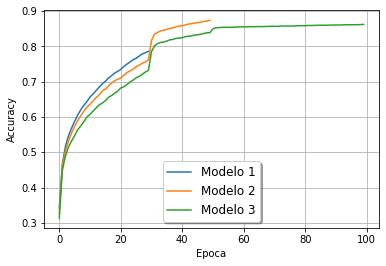

In [10]:
model_lr1.save(images_path + 'lenet1.h5')
model_lr2.save(images_path + 'lenet2.h5')
model_lr3.save(images_path + 'lenet3.h5')
fig, ax = plt.subplots()
ax.plot(history[0].history['acc'], label='Modelo 1')
ax.plot(history[1].history['acc'], label='Modelo 2')
ax.plot(history[2].history['acc'], label='Modelo 3')

legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.savefig(images_path + 'metric_var_lr_accuracy.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

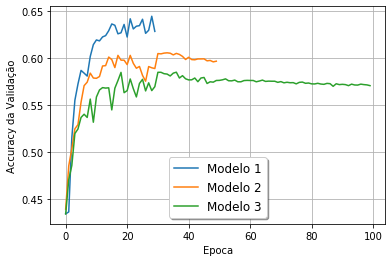

In [11]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_acc'], label='Modelo 1')
ax.plot(history[1].history['val_acc'], label='Modelo 2')
ax.plot(history[2].history['val_acc'], label='Modelo 3')


legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Accuracy da Validação')
plt.savefig(images_path + 'metric_var_lr_val_accuracy.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

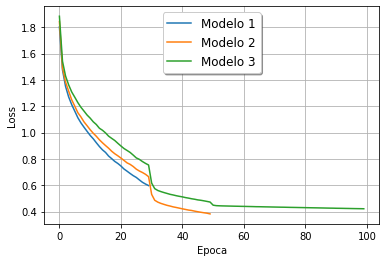

In [12]:
fig, ax = plt.subplots()
ax.plot(history[0].history['loss'], label='Modelo 1')
ax.plot(history[1].history['loss'], label='Modelo 2')
ax.plot(history[2].history['loss'], label='Modelo 3')


legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.savefig(images_path + 'metric_var_lr_loss.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

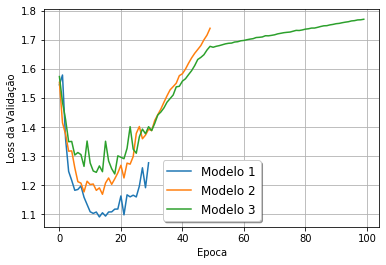

In [13]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_loss'], label='Modelo 1')
ax.plot(history[1].history['val_loss'], label='Modelo 2')
ax.plot(history[2].history['val_loss'], label='Modelo 3')

legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Loss da Validação')
plt.savefig(images_path + 'metric_var_lr_val_loss.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

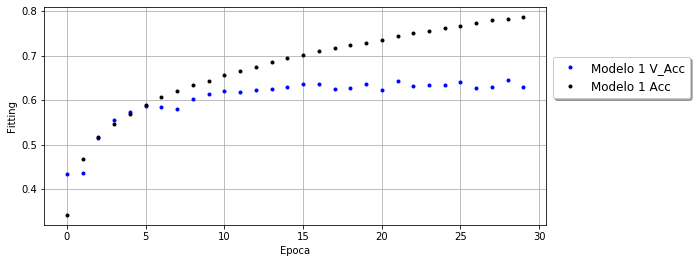

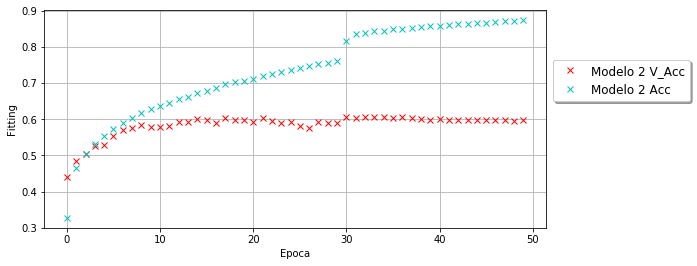

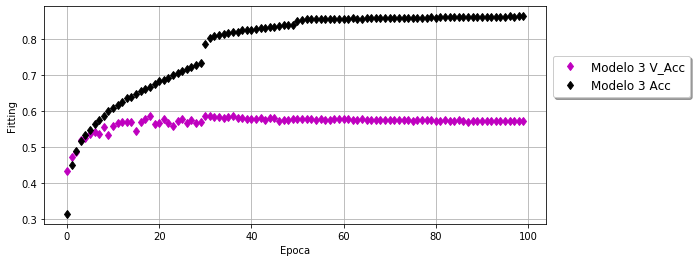

In [14]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_acc'], '.',color = 'b', label='Modelo 1 V_Acc')
ax.plot(history[0].history['acc'], '.', color = 'k', label='Modelo 1 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting1.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
ax.plot(history[1].history['val_acc'], 'x',color = 'r', label='Modelo 2 V_Acc')
ax.plot(history[1].history['acc'], 'x',color = 'c', label='Modelo 2 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting2.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
ax.plot(history[2].history['val_acc'], 'd',color = 'm', label='Modelo 3 V_Acc')
ax.plot(history[2].history['acc'], 'd',color = 'k', label='Modelo 3 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting3.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()


#Metricas

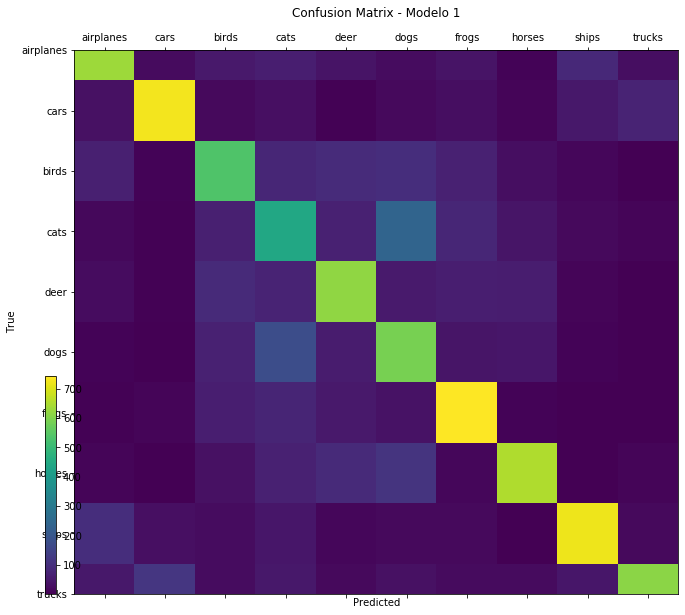

In [15]:
Y_pred1 = model_lr1.predict(x_test)

import numpy as np
y_pred1 = np.argmax(Y_pred1, axis=1)
#print (y_pred1)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
#labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = skmetrics.confusion_matrix(Y_test, y_pred1)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 1')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'metric_var_lr_cm_model1_.png', bbox_inches='tight', dpi=1000)
plt.show()

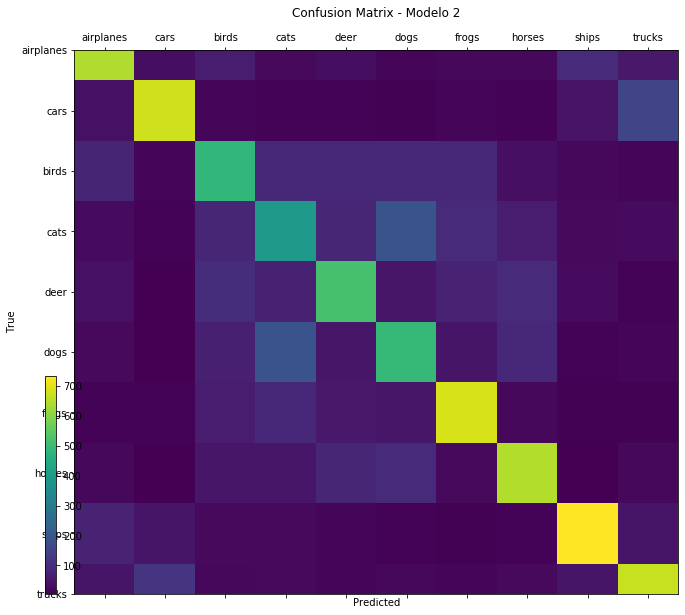

In [16]:
Y_pred2 = model_lr2.predict(x_test)

import numpy as np
y_pred2 = np.argmax(Y_pred2, axis=1)
#print (y_pred2)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
cm = skmetrics.confusion_matrix(Y_test, y_pred2)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 2')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'train_history_cm_model2_.png', bbox_inches='tight', dpi=1000)
plt.show()

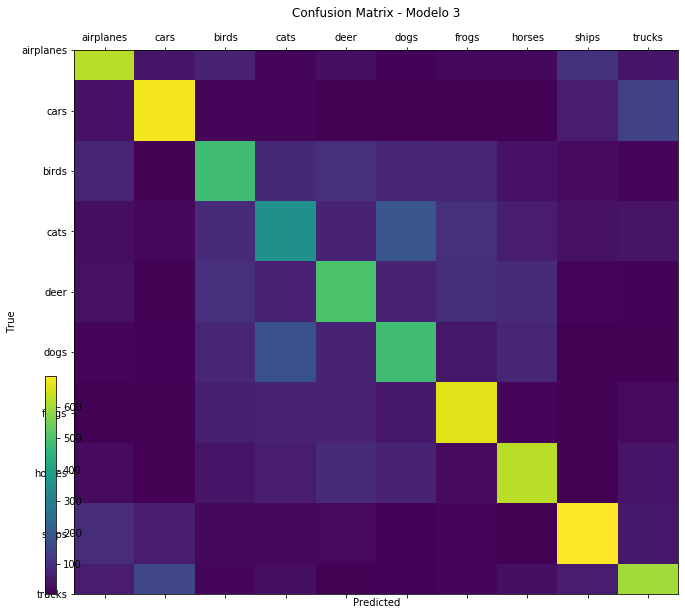

In [17]:
Y_pred3 = model_lr3.predict(x_test)

import numpy as np
y_pred3 = np.argmax(Y_pred3, axis=1)
#print (y_pred2)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
cm = skmetrics.confusion_matrix(Y_test, y_pred3)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 3')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'train_history_cm_model3_.png', bbox_inches='tight', dpi=1000)
plt.show()

In [0]:
precision = {}
recall = {}
fbeta_score = {}
support = {}
precision[0], recall[0], fbeta_score[0], support[0] = skmetrics.precision_recall_fscore_support(Y_test, y_pred1)
precision[1], recall[1], fbeta_score[1], support[1] = skmetrics.precision_recall_fscore_support(Y_test, y_pred2)
precision[2], recall[2], fbeta_score[2], support[2] = skmetrics.precision_recall_fscore_support(Y_test, y_pred3)


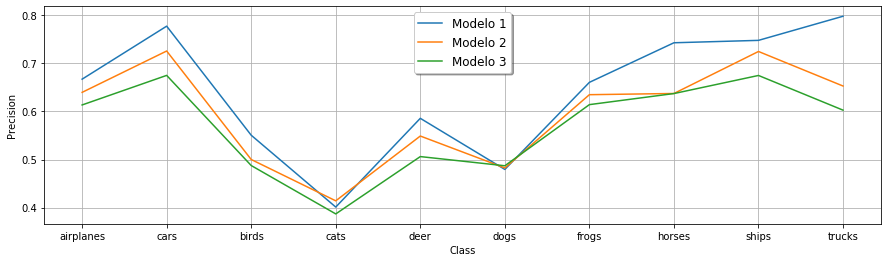

In [19]:
fig, ax = plt.subplots()
ax.plot(labels,precision[0], label='Modelo 1')
ax.plot(labels,precision[1], label='Modelo 2')
ax.plot(labels,precision[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_precision_.png', bbox_inches='tight', dpi=1000)
plt.show()

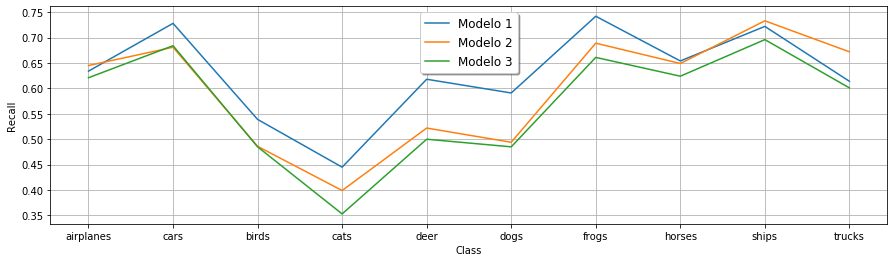

In [20]:
fig, ax = plt.subplots()
ax.plot(labels,recall[0], label='Modelo 1')
ax.plot(labels,recall[1], label='Modelo 2')
ax.plot(labels,recall[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_recall_.png', bbox_inches='tight', dpi=1000)
plt.show()

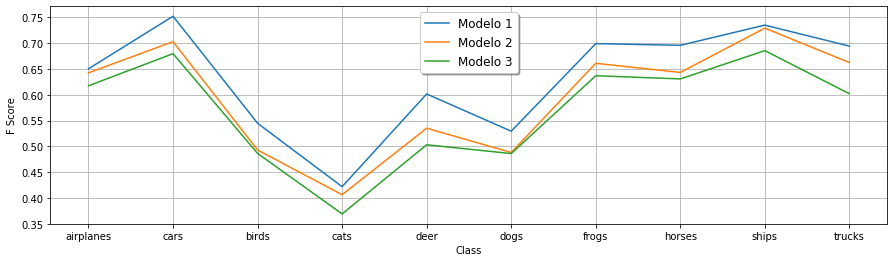

In [21]:
fig, ax = plt.subplots()
ax.plot(labels,fbeta_score[0], label='Modelo 1')
ax.plot(labels,fbeta_score[1], label='Modelo 2')
ax.plot(labels,fbeta_score[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('F Score')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_fscore.png', bbox_inches='tight', dpi=1000)
plt.show()

In [22]:
print('Modelo 1 \n')
print('accuracy ' + str(history[0].history['acc'][-1]))
print('validation accuracy ' + str(history[0].history['val_acc'][-1]))
print('loss ' + str(history[0].history['loss'][-1]))
print('validation loss ' + str(history[0].history['val_loss'][-1]))

Modelo 1 

accuracy 0.786159999961853
validation accuracy 0.6287
loss 0.5977109429740906
validation loss 1.2768943126678467


In [23]:
print('Modelo 2 \n')
print('accuracy ' + str(history[1].history['acc'][-1]))
print('validation accuracy ' + str(history[1].history['val_acc'][-1]))
print('loss ' + str(history[1].history['loss'][-1]))
print('validation loss ' + str(history[1].history['val_loss'][-1]))

Modelo 2 

accuracy 0.874240000038147
validation accuracy 0.597
loss 0.38239514976501465
validation loss 1.7392142478942871


In [24]:
print('Modelo 3 \n')
print('accuracy ' + str(history[2].history['acc'][-1]))
print('validation accuracy ' + str(history[2].history['val_acc'][-1]))
print('loss ' + str(history[2].history['loss'][-1]))
print('validation loss ' + str(history[2].history['val_loss'][-1]))

Modelo 3 

accuracy 0.86234
validation accuracy 0.571
loss 0.421558243227005
validation loss 1.7702518720626832
